# **K Nearest Neighbors**



Iris dataset [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) \
k-NN documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.datasets import load_iris # Iris dataset

In [4]:
iris = load_iris() # Load the iris dataset
iris_x = iris.data[:,0:2] # Features. We'll pick 2
iris_y = iris.target # Labels
iris_names = iris.target_names
iris_features = iris.feature_names[0:2]

# Print shapes
print ( iris_x.shape,iris_y.shape , "\n Names: ", iris_names, "\n Features: ", iris_features,)

(150, 2) (150,) 
 Names:  ['setosa' 'versicolor' 'virginica'] 
 Features:  ['sepal length (cm)', 'sepal width (cm)']


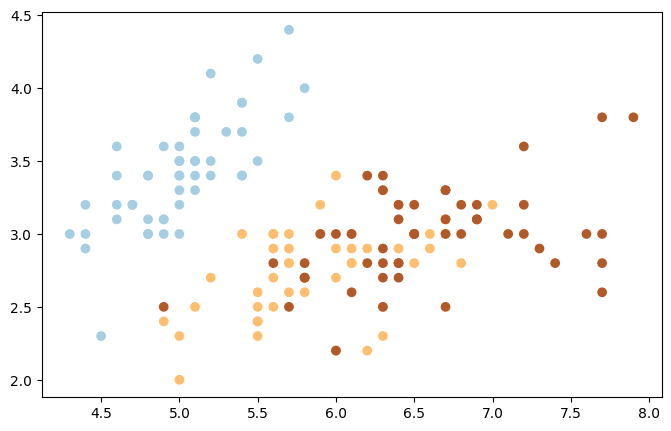

In [6]:
_, ax = plt.subplots (figsize=(8,5))
ax.scatter(iris_x[:,0],iris_x[:,1], c=iris_y,cmap = 'Paired')

In [24]:
# Instance kNN object
n_neighbors = 3
knn = kNN(n_neighbors = n_neighbors , metric = "euclidean")

# Training
knn.fit( iris_x , iris_y ) # (num_samples, num_features), (num_samples)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [18]:
#Draw shape of
prec = 0.1
# Valores minimos y maximos para crear el grid de las fronteras de decision
x_min, x_max = iris_x[:, 0].min()-prec, iris_x[:, 0].max()+prec
y_min, y_max = iris_x[:, 1].min()-prec, iris_x[:, 1].max()+prec

# Crear el grid de las fronteras de decision
# x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, prec), np.arange(y_min, y_max, prec)) #Option 1
x_grid, y_grid = np.meshgrid(np.linspace(x_min,x_max,300), np.linspace(y_min,y_max,300)) #Option 2


In [19]:
# Predecir los valores del grid
predictions = knn.predict(np.c_[x_grid.ravel(), y_grid.ravel()])
print (predictions.shape)
predictions = predictions.reshape(x_grid.shape)

(90000,)


In [27]:
predictions = knn.predict(np.c_[x_grid.ravel(), y_grid.ravel()])
predictions = predictions.reshape(x_grid.shape)
print (x_grid.shape, y_grid.shape, predictions.shape)

(300, 300) (300, 300) (300, 300)


## Using the Fruits dataset

Download the fruits data [here](https://drive.google.com/file/d/1M8tiAWDZclABJN1Meq9oEHCLJTNyHdpP/view?usp=share_link)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as kNN

In [ ]:
fruit_data = pd.read_csv("/content/fruits_data_ext.csv") # Load the fruits dataset
fruit_data

,Unnamed: 0,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,0,1,apple,granny_smith,192.0,8.400000,7.300000,0.550000
1,1,1,apple,granny_smith,180.0,8.000000,6.800000,0.590000
2,2,1,apple,granny_smith,176.0,7.400000,7.200000,0.600000
3,3,2,mandarin,mandarin,86.0,6.200000,4.700000,0.800000
4,4,2,mandarin,mandarin,84.0,6.000000,4.600000,0.790000
...,...,...,...,...,...,...,...,...
172,54,4,lemon,unknown,119.0,6.322908,8.722908,0.721145
173,55,4,lemon,unknown,124.0,6.802490,8.202490,0.745125
174,56,4,lemon,unknown,145.0,7.829831,10.029831,0.826492
175,57,4,lemon,unknown,171.0,7.763532,9.763532,0.783177


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(fruit_data, *['Unnamed: 0'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(fruit_data, *['fruit_label'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(fruit_data, *['mass'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(fruit_data, *['width'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(fruit_data, *['Unnamed: 0'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(fruit_data, *['fruit_label'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(fruit_data, *['mass'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(fruit_data, *['width'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(fruit_data, *['fruit_name'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(fruit_data, *[[['Unnamed: 0', 'fruit_label'], ['fruit_label', 'mass'], ['mass', 'width'], ['width', 'height']]], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(fruit_data, *['Unnamed: 0', 'fruit_name'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(fruit_data, *['fruit_label', 'fruit_name'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(fruit_data, *['mass', 'fruit_name'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(fruit_data, *['width', 'fruit_name'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(fruit_data, *['Unnamed: 0'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(fruit_data, *['fruit_label'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(fruit_data, *['mass'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(fruit_data, *['width'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(fruit_data, *['Unnamed: 0'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(fruit_data, *['fruit_label'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(fruit_data, *['mass'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(fruit_data, *['width'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(fruit_data, *['fruit_name'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(fruit_data, *[[['Unnamed: 0', 'fruit_label'], ['fruit_label', 'mass'], ['mass', 'width'], ['width', 'height']]], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(fruit_data, *['Unnamed: 0', 'fruit_name'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(fruit_data, *['fruit_label', 'fruit_name'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(fruit_data, *['mass', 'fruit_name'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(fruit_data, *['width', 'fruit_name'], **{'inner': 'stick'})
chart

In [ ]:
print(fruit_data.columns)
print(np.unique(fruit_data["fruit_name"],return_counts=True))

Index(['Unnamed: 0', 'fruit_label', 'fruit_name', 'fruit_subtype', 'mass',
       'width', 'height', 'color_score'],
      dtype='object')
(array(['apple', 'lemon', 'mandarin', 'orange'], dtype=object), array([57, 48, 15, 57]))


In [ ]:
#Aplicando estadistica a los datos.

list_features = [ 'mass','width', 'height', 'color_score']

for feature in list_features:
  print(fruit_data[feature].describe())
  print("skew: {0} ; kurt: {1}".format(fruit_data[feature].skew(), fruit_data[feature].kurt()))
  print("\n\n")


count    177.000000
mean     167.932203
std       54.784246
min       76.000000
25%      142.000000
50%      162.000000
75%      180.000000
max      367.000000
Name: mass, dtype: float64
skew: 1.779465047406155 ; kurt: 4.889801524194087



count    177.000000
mean       7.425974
std        0.961510
min        5.800000
25%        7.000000
50%        7.304428
75%        7.829831
max        9.931226
Name: width, dtype: float64
skew: 0.37184709901406754 ; kurt: -0.08742086317688669



count    177.000000
mean       8.014110
std        1.456028
min        4.000000
25%        7.300000
50%        7.900000
75%        8.722908
max       12.162937
Name: height, dtype: float64
skew: -0.2423922488709975 ; kurt: 1.3017024928680225



count    177.000000
mean       0.778926
std        0.080898
min        0.550000
25%        0.720000
50%        0.770000
75%        0.830000
max        0.993844
Name: color_score, dtype: float64
skew: -0.06215452994558197 ; kurt: 0.2725848015207317





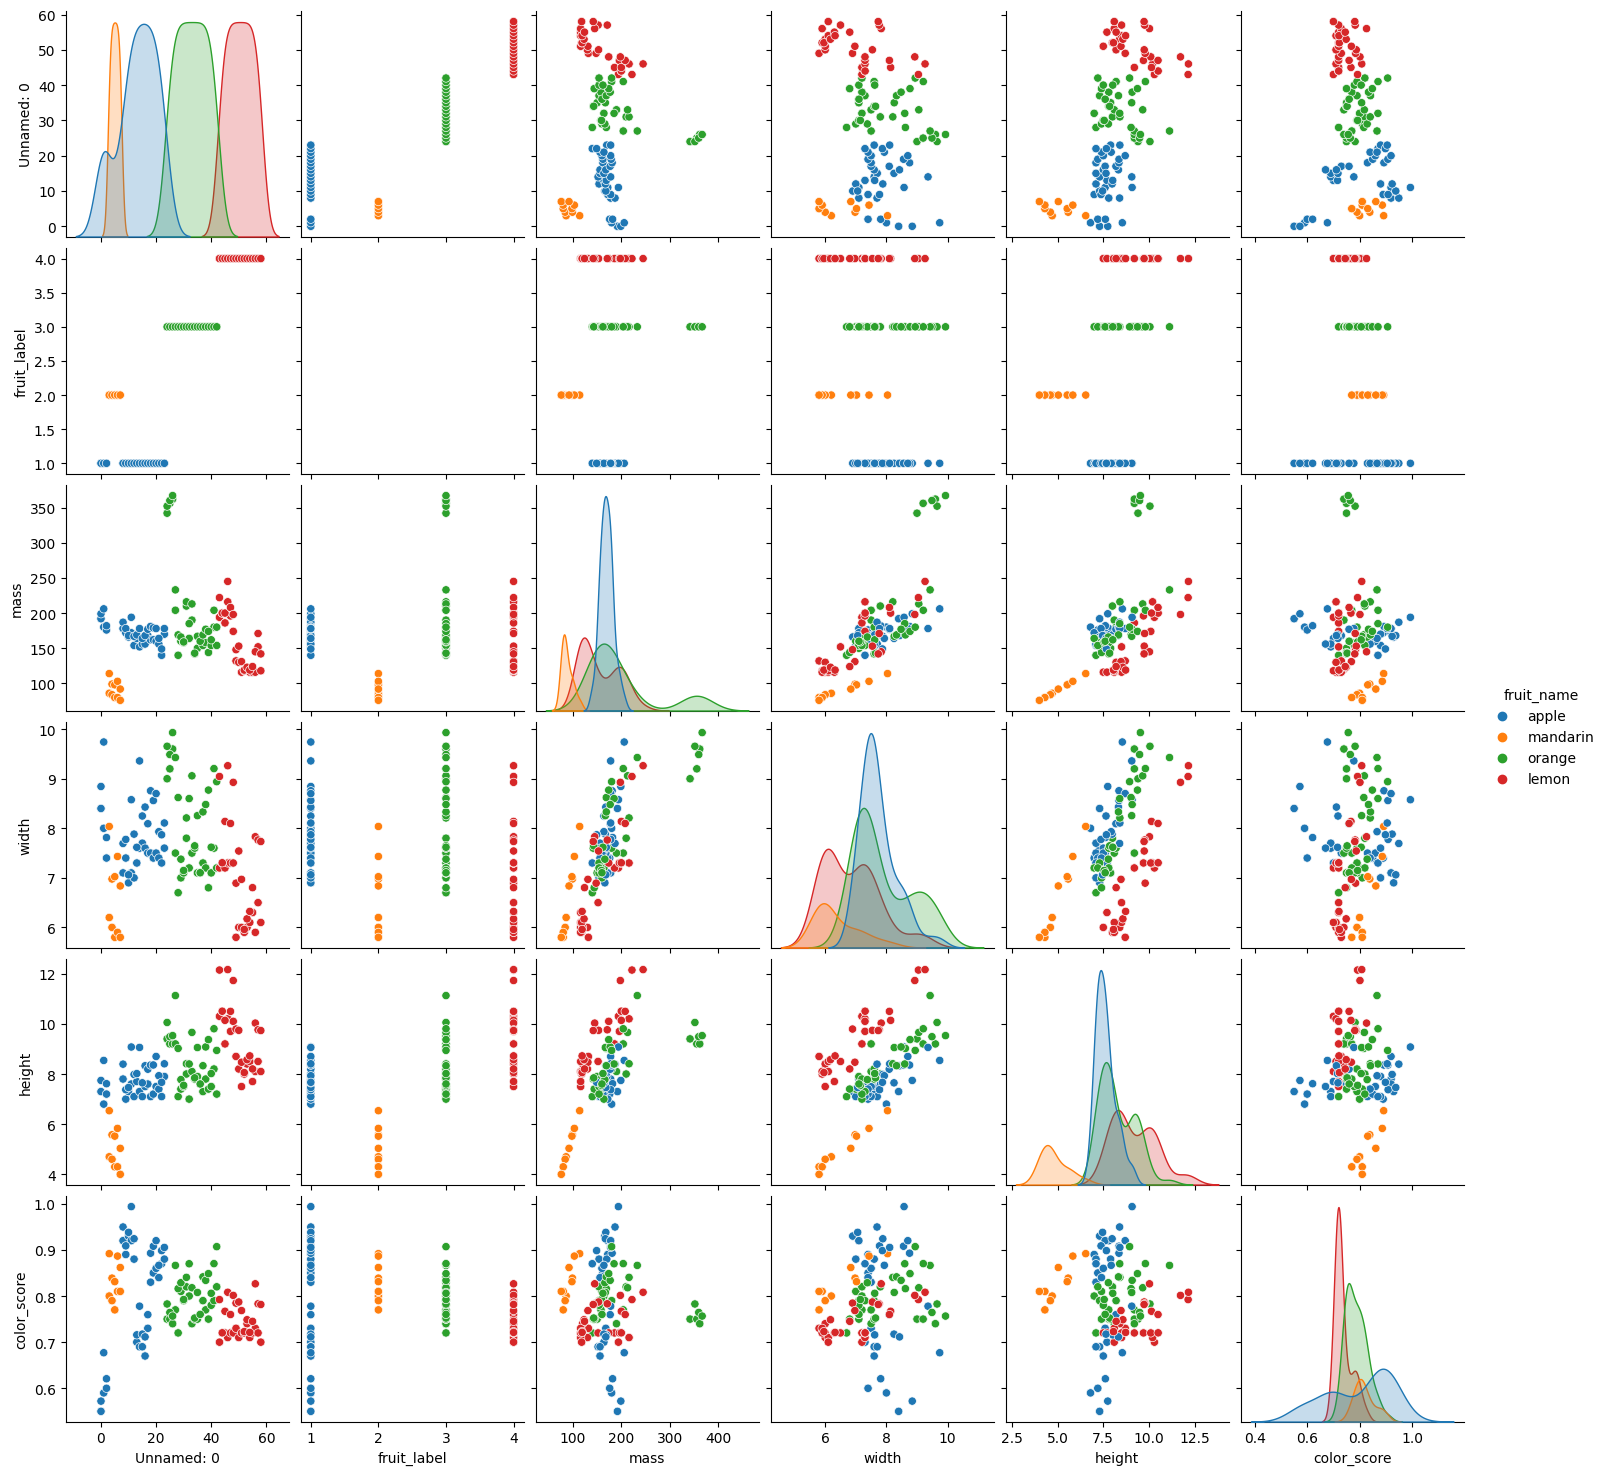

In [ ]:
import seaborn as sns
sns.pairplot(fruit_data, hue="fruit_name")

In [ ]:
fruits_x =   # Features. We'll pick 2
fruits_y = _  # Labels

# Convert everything to a np array
fruits_x, fruits_y = np.asarray(fruits_x), np.asarray(fruits_y)

# Print shapes
print ( _ )

In [ ]:
# Instance kNN object
n_neighbors = _
knn = kNN(n_neighbors = _ )

# Training
 _ #(num_samples, Features)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
## Plot decision boundaries
_